<a href="https://colab.research.google.com/github/vivekbabu9640/DataScienceProjects/blob/main/Intro_to_AI_%26_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### importing libraries


In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasClassifier


### loading csv file

In [ ]:
df = pd.read_csv('/content/fitness_dataset.csv')

### preview of data

In [ ]:
df.head(5)

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


### preview



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [ ]:
print(df.columns)

Index(['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index', 'smokes',
       'gender', 'is_fit'],
      dtype='object')


### number of records and features

In [ ]:
print(df.shape)

(2000, 11)


### checking null values

In [ ]:
print(df.isnull().sum())

age                    0
height_cm              0
weight_kg              0
heart_rate             0
blood_pressure         0
sleep_hours          160
nutrition_quality      0
activity_index         0
smokes                 0
gender                 0
is_fit                 0
dtype: int64


In [ ]:
print(df.sleep_hours)

0       NaN
1       7.5
2       NaN
3       7.0
4       8.0
       ... 
1995    NaN
1996    9.4
1997    8.3
1998    6.7
1999    8.3
Name: sleep_hours, Length: 2000, dtype: float64


### checking outliers using boxplot

Index(['age', 'height_cm', 'weight_kg', 'heart_rate', 'blood_pressure',
       'sleep_hours', 'nutrition_quality', 'activity_index', 'is_fit'],
      dtype='object')


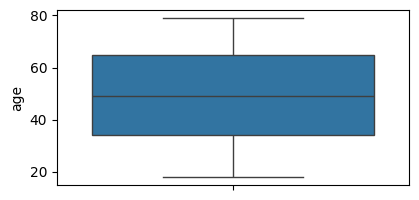

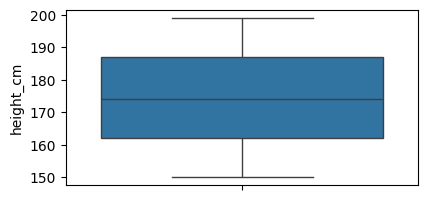

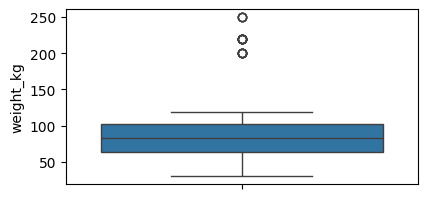

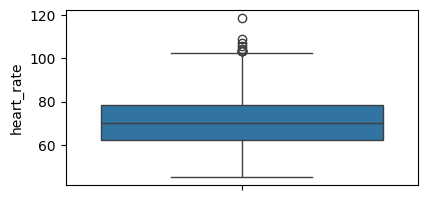

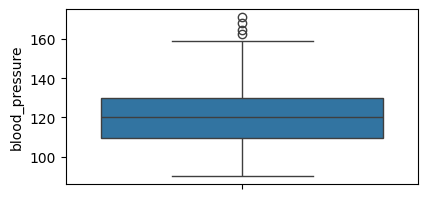

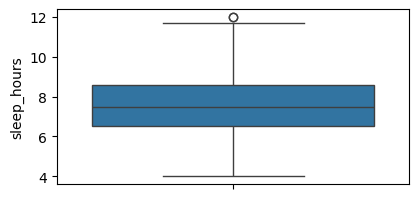

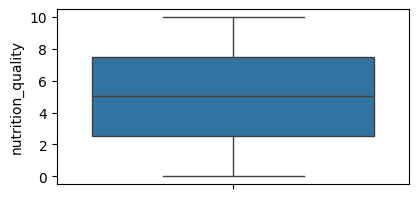

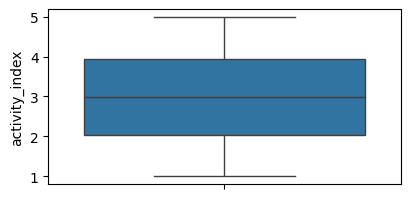

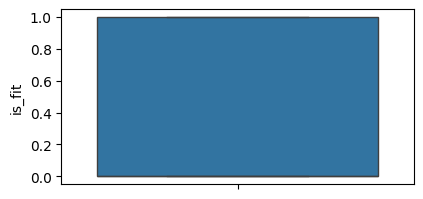

In [ ]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
print(num_col)

for col in num_col:
  plt.figure(figsize=(10,5))
  plt.subplot(2,2,2)
  sns.boxplot(df[col])
  plt.show()

### treating outliers

In [ ]:
# weight column outliers

q1 = df['weight_kg'].quantile(0.25)

q3 = df['weight_kg'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

weight_outliers = df[(df['weight_kg']<lower_bound) | (df['weight_kg']>upper_bound)]
print(f"count of weight outliers: {len(weight_outliers)}")
print(f"total count of weight column data: {len(df['weight_kg'])}")
print(f"percentage of weight outliers: {len(weight_outliers)/len(df['weight_kg'])*100}")




# as outlier percentage is 1.05% i.e, 21 outliers we cannot drop that rows hence we will impute them with median

print(f"median weight_kg: {df['weight_kg'].median()}")

median_val = df['weight_kg'].median()

df['weight_kg'] = df['weight_kg'].mask(
    (df['weight_kg'] < lower_bound) | (df['weight_kg'] > upper_bound),
    median_val
)

print(df['weight_kg'])


count of weight outliers: 21
total count of weight column data: 2000
percentage of weight outliers: 1.05
median weight_kg: 83.0
0        65
1        95
2       103
3        83
4        99
       ... 
1995     98
1996     74
1997     89
1998     63
1999     78
Name: weight_kg, Length: 2000, dtype: int64


In [ ]:
print(df['heart_rate'].isnull().sum())

np.int64(0)

### treating nulls in sleeping hours

In [ ]:
print(f"median sleep hours: {df['sleep_hours'].median()}")
print(f"mean sleep hours: {df['sleep_hours'].mean()}")

df['sleep_hours']=df['sleep_hours'].fillna(df['sleep_hours'].median())

median sleep hours: 7.5
mean sleep hours: 7.5133152173913045


### descriptive statistics

In [ ]:
df.describe()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,is_fit
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,49.114000,174.53300,82.112000,70.288600,119.908850,7.512250,5.035140,2.999040,0.399500
std,17.926564,14.37175,21.684639,11.846339,14.578032,1.440671,2.864156,1.136383,0.489918
min,18.000000,150.00000,30.000000,45.000000,90.000000,4.000000,0.000000,1.000000,0.000000
25%,34.000000,162.00000,64.000000,62.100000,109.700000,6.600000,2.547500,2.037500,0.000000
50%,49.000000,174.00000,83.000000,70.250000,120.000000,7.500000,5.065000,2.980000,0.000000
75%,65.000000,187.00000,101.000000,78.425000,129.800000,8.400000,7.470000,3.950000,1.000000
max,79.000000,199.00000,119.000000,118.600000,171.200000,12.000000,10.000000,4.990000,1.000000


### treating mixed types of 'smokes' column

In [ ]:
df['smokes'] = df['smokes'].map({'yes': 1, 'no': 0, '1':1,'0':0}).astype(int)
print(df['smokes'].head(10))
print(f"data type of smokes:{df['smokes'].dtype}")
print(df['smokes'].value_counts())

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    0
8    0
9    0
Name: smokes, dtype: int64
data type of smokes:int64
smokes
0    1099
1     901
Name: count, dtype: int64


In [ ]:
lencoder = LabelEncoder()


df['gender'] = lencoder.fit_transform(df['gender'])
print(df['gender'])

0       0
1       0
2       0
3       1
4       0
       ..
1995    1
1996    1
1997    1
1998    0
1999    1
Name: gender, Length: 2000, dtype: int64


### Calculating BMI using height and weight, domain specific term used for better relation wit target variable

In [ ]:
#dividing height by 100 to convert to metres
df['bmi'] = df['weight_kg'] / (df['height_cm'] / 100) ** 2
print(df['bmi'])


0       28.133657
1       27.459822
2       27.940538
3       23.235632
4       32.326531
          ...    
1995    32.744161
1996    21.389756
1997    22.701765
1998    17.451524
1999    28.305995
Name: bmi, Length: 2000, dtype: float64


### Data Splitting

In [ ]:
X = df.drop('is_fit', axis =1)
y = df['is_fit']

### Model Training and Evaluation

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


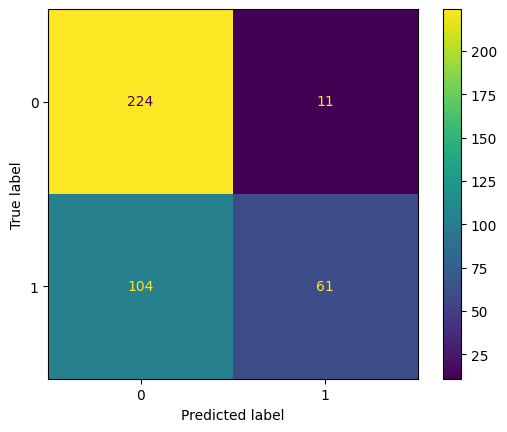

In [ ]:
#creating logistic regression using keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score, classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




log_model = Sequential([Dense(1,activation='sigmoid', input_dim = X_train.shape[1])])
log_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])



learning_rate = [0.001, 0.01, 0.1]
epochs= [20, 50, 100]
batch_sizes = [16, 32, 64]

best_accuracy = 0
best_params = []
best_precision = 0


for lr in learning_rate:
  for ep in epochs:
    for bs in batch_sizes:
      log_model.compile(optimizer=Adam(learning_rate=lr),loss='binary_crossentropy',metrics=['accuracy'])
      log_model.fit(X_train, y_train, epochs=ep, batch_size=bs, verbose=0)
      y_pred = log_model.predict(X_test)

      # Convert continuous predictions to binary (0 or 1)
      y_pred_binary = (y_pred > 0.5).astype(int)

      accuracy = accuracy_score(y_test,y_pred_binary)

      if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = (lr, ep, bs)
        best_precision = precision_score(y_test, y_pred_binary)
        best_recall = recall_score(y_test, y_pred_binary)
        best_f1 = f1_score(y_test, y_pred_binary)

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Parameters (learning_rate, epochs, batch_size): {best_params}")
print(f"Best Precision {(best_precision):.3f}")
print(f"Best Recall {best_recall:.3f}")
print(f"Best F1 Score {best_f1:.3f}")

print(f"classification report : {classification_report(y_test,y_pred_binary)}")

cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

Best parameters:  {'n_neighbors': 9}
Best accuracy:  0.765
confusion matrix:
[[194  41]
 [ 73  92]]
precision: 0.692
recall: 0.558
f1 score: 0.617
classification report
               precision    recall  f1-score   support

           0       0.73      0.83      0.77       235
           1       0.69      0.56      0.62       165

    accuracy                           0.71       400
   macro avg       0.71      0.69      0.70       400
weighted avg       0.71      0.71      0.71       400



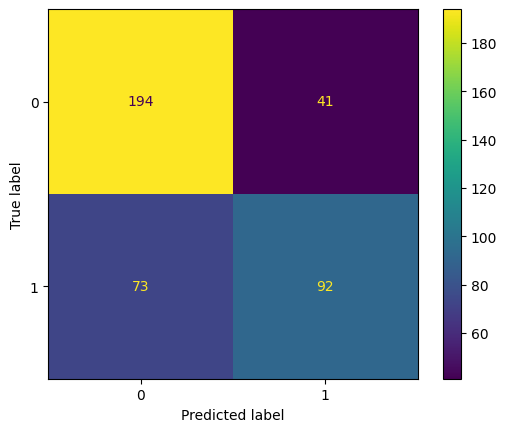

In [ ]:
#creating KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt # Import matplotlib.pyplot

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


num_of_neighbours = [3,4,5,6,7,8,9]

param_grid = {'n_neighbors': num_of_neighbours}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


# Predict using the best KNN model found by GridSearchCV
best_knn_model = grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test_scaled)

print('confusion matrix:')
print(confusion_matrix(y_test, y_pred_knn))


print(f"precision: {precision_score(y_test, y_pred_knn):.3f}")
print(f"recall: {recall_score(y_test, y_pred_knn):.3f}")
print(f"f1 score: {f1_score(y_test, y_pred_knn):.3f}") # added f1 score

print(f"classification report\n {classification_report(y_test,y_pred_knn)}")

cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

### Logistic Regression Vs KNearestNeighbours

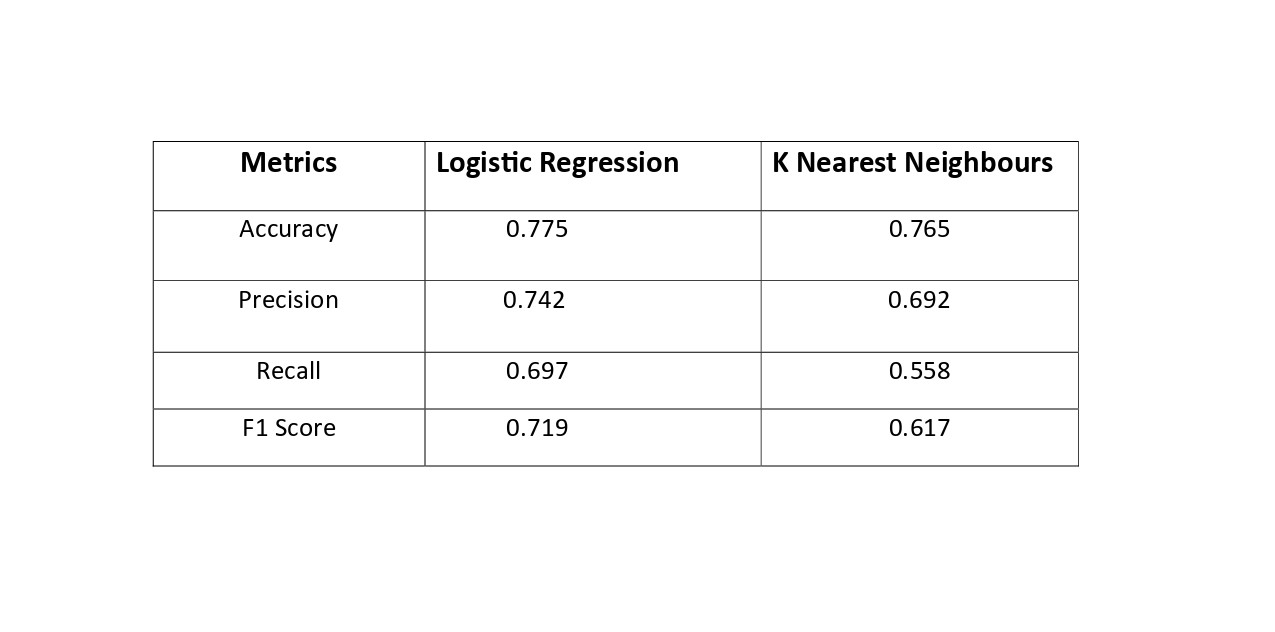

# Project Report

# Introduction

In this project we are focusing on predicting individual's fitness status as "is_fit" using Machine Learning models which were applied to fitness dataset. The dataset contains relevant features like weight, height, sleep hours, smoking habits, nutrition quality and gender etc.


The main goal is to preprocess the uncleaned dataset by handling missing values and outliers. Build models to classify fit and unfit individuals. Evaluate the model's performance.

# About Dataset

In [ ]:
from IPython.display import HTML

HTML("<a href='https://www.kaggle.com/datasets/muhammedderric/fitness-classification-dataset-synthetic' target='_blank'>Dataset Link</a>")


Features: gender, age, smokes, sleep_hours, weight_kg, height_cm, heart_rate

Target Variable: is_fit

# Data Preprocessing

## Data cleaning

* sleep_hours is filled with median
values
* weight_kg this feature outliers were detected using IQR method and  
* 'smokes' enocded to 1 for yes and 0 for no
* gender is encoded usinf Label Encoder

# Model Development & Evaluation

## Logistic regression

* Model: Logistic Regression using sigmoid function for binary classification.
* Hyperparameter tuning:
* Learning rates [0.001, 0.01, 0.1]
* Epochs: [20,50,100]
* Batch sizes: [16,32,64]
* Metrics: Accuracy, Precision, Recall, F1 Score


## K Nearest Neighbours

* Model : KNN Classififer
* Hyperparameter tuning: GridsearchCV with neighbours from k=3 to k=9
* Best parameters extracted from GridSearchCV
* Metrics: Accuracy, Precision, Recall, F1 Score

### Conclusion

* Both models are able to classify fit and unfit individuals with reasonable accuracy.
* Logistic regression with neural networks is competitive with best parameters.
* KNN performed well after scaling numerical features.
* creating new domain specific feature BMI improved interpretability.
* Analysis and exploration of additional health related features for more accurate predictions.
